In [136]:
# Normal Distribution Formula

# Xnew = x - xmin/xmax - xmin

# A standard normal distribution is a normal distribution with mean 0 and standard deviation 1

# Xnew = x- mean/std

# Null Hupothesis

# Alternate Hypothesis

# Degree of Freedom

In [34]:
from scipy import stats
from statsmodels.stats import weightstats as stests
import numpy as np
import pandas as pd

In [24]:
# If we observe a large p values then we cannot reject the null hypothesis
# If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis 

### One Sample T Test

In [19]:
np.random.seed(7654567)  # fix seed to get the same result
rvs = stats.norm.rvs(loc=5, scale=10, size=(50,2)) # Creating a normal distribution of mean 5 and std 10
print(stats.ttest_1samp(rvs,5.0)) # Testing with the known population mean of 5
print(stats.ttest_1samp(rvs,0.0)) # Testing with the known population mean of 0

Ttest_1sampResult(statistic=array([-0.68014479, -0.04323899]), pvalue=array([0.49961383, 0.96568674]))
Ttest_1sampResult(statistic=array([2.77025808, 4.11038784]), pvalue=array([0.00789095, 0.00014999]))


### Paird T Test 

In [23]:
np.random.seed(12345678)
rvs1 = stats.norm.rvs(loc=5,scale=10,size=500)
rvs2 = (stats.norm.rvs(loc=5,scale=10,size=500) + stats.norm.rvs(scale=0.2,size=500))
rvs3 = (stats.norm.rvs(loc=8,scale=10,size=500) + stats.norm.rvs(scale=0.2,size=500))
print(stats.ttest_rel(rvs1,rvs2))
print(stats.ttest_rel(rvs1,rvs3))

# Examples for the use are scores of the same set of student in different exams

Ttest_relResult(statistic=0.24101764965300979, pvalue=0.8096404344581155)
Ttest_relResult(statistic=-3.9995108708727924, pvalue=7.308240219166128e-05)


### Independet T Test 

In [31]:
np.random.seed(12345678)
rvs1 = stats.norm.rvs(loc=5,scale=10,size=500) # Test with sample with identical means
rvs2 = stats.norm.rvs(loc=5,scale=10,size=500) 
print(stats.ttest_ind(rvs1,rvs2))
print(stats.ttest_ind(rvs1,rvs2, equal_var = False))

rvs3 = stats.norm.rvs(loc=5, scale=20, size=500) # ttest_ind underestimates p for unequal variances
print(stats.ttest_ind(rvs1, rvs3))

rvs4 = stats.norm.rvs(loc=8, scale=20, size=100)
print(stats.ttest_ind(rvs1, rvs4))

Ttest_indResult(statistic=0.26833823296238857, pvalue=0.788494433695651)
Ttest_indResult(statistic=0.26833823296238857, pvalue=0.7884945274950106)
Ttest_indResult(statistic=-0.46580283298287956, pvalue=0.6414582741343561)
Ttest_indResult(statistic=-3.386962586143801, pvalue=0.0007531032817270578)


### One Sample Z Test

In [63]:
data ={'bp_after': [10,12,13,12,11,12,15,18,12,13],'bp_before' : [11,13,14,13,12,11,18,18,16,15]}

datas = pd.DataFrame(data)
ztest ,pval = stests.ztest(datas['bp_before'], x2=None, value=16)
print(float(pval))

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.02090163547951763
reject null hypothesis


### Two Sample Z Test 

In [62]:
ztest ,pval1 = stests.ztest(datas['bp_before'], x2=datas['bp_after'], value=0,alternative='two-sided')
print(float(pval1))

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.23206348890203465
accept null hypothesis


In [ ]:
# Paired-samples t tests compare scores on two different variables but for the same group of cases; 
''' The average score of subjects on the posttest is different than the average of those same
subjects on the pretest '''
'''Graduates had higher average salaries 10 years after graduation than they had 5 years after
graduation.'''


# independent-samples t tests compare scores on the same variable but for two different groups of cases
'''Catholic women on an average have more children than Protestant women '''
'''The mean years of schooling of Republicans are different than the mean years of schooling
of Democrats'''

### ANOVA (F-TEST) 

In [65]:
# F = Between group variability / Within group variability
# One Way F-test(Anova) :- It tell whether two or more groups are similar or not based on their mean similarity and f-score

In [82]:
data = {'Weight': [4.71,5.35,5.18,6.11,4.5,5.17,5.33,4.41,3.59,5.87],'group':['ctrl','trt1','trt2','ctrl','ctrl','trt1','trt1','ctrl','trt2','trt2']}
data = pd.DataFrame(data)
df_anova = data[['Weight','group']]

grps = pd.unique(df_anova.group.values)
d_data = {grp:df_anova['Weight'][df_anova.group == grp] for grp in grps}

F, p = stats.f_oneway(d_data['ctrl'], d_data['trt1'], d_data['trt2'])
print("p-value for significance is: ", p)

p-value for significance is:  0.8049243008499225


### Two Way ANOVA

In [102]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
df_anova2 = pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/crop_yield.csv")

C:\Users\kingm\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [103]:
model = ols('Yield ~ C(Fert)*C(Water)',df_anova2).fit()
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
res = sm.stats.anova_lm(model, typ= 2)
res

Overall model F( 3, 16) =  4.112, p =  0.0243


,sum_sq,df,F,PR(>F)
C(Fert),69.192,1.0,5.766000,0.028847
C(Water),63.368,1.0,5.280667,0.035386
C(Fert):C(Water),15.488,1.0,1.290667,0.272656
Residual,192.000,16.0,NaN,NaN


### Chi Square Test 

In [128]:
from scipy.stats import chisquare
print(chisquare([16, 18, 16, 14, 12, 12])) # When just f_obs is given, it is assumed that the expected frequencies 
# are uniform and given by the mean of the observed frequencies.

print(chisquare([16, 18, 16, 13, 14, 14], f_exp=[16, 16, 16, 16, 16, 16])) # With f_exp the expected frequencies can be given

Power_divergenceResult(statistic=2.0, pvalue=0.8491450360846096)
Power_divergenceResult(statistic=1.3125, pvalue=0.933640196971634)


In [129]:
# What is the statistical Score?

In [130]:
# Critical values and p values

In [131]:
# When the P value should be less than 5 percent and when it should be more than 5 percent?

In [140]:
# Normalizing the data

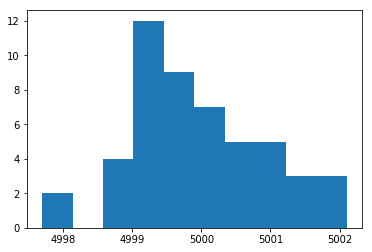

In [149]:
# histogram plot of a small sample
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate a univariate data sample
data = randn(50) + 100 *50

# histogram
pyplot.hist(data)
pyplot.show()

In [145]:
data

array([181.21726818,  69.41217932,  73.59141239,  46.35156889,
       143.27038147, -15.07693484, 187.24058821,  61.93965496,
       115.9519548 ,  87.53148123, 173.10539685,  -3.00703547,
        83.8791398 ,  80.79728227, 156.68847212,  45.00543663,
        91.37858962,  56.1070791 , 102.11068734, 129.14076069,
        44.96904114, 157.23618549, 145.07953603, 125.12471695,
       145.04279746,  65.81360704,  93.85548872,  53.21152829,
        86.60559602, 126.51777334,  65.41696241,  80.16232366,
        65.64136499,  57.73971793,  66.43769346,  99.36677005,
        44.13448257, 111.72078489, 182.99010886, 137.10220803,
        90.40822238,  55.6185518 ,  62.64208531, 184.62273005,
       102.54038774,  68.15021767, 109.54577423, 205.01275682,
       106.00794762, 130.86015549])

In [144]:
# Increasing the size of the sample from 50 to 100 can help to better expose the Gaussian shape of the data distribution

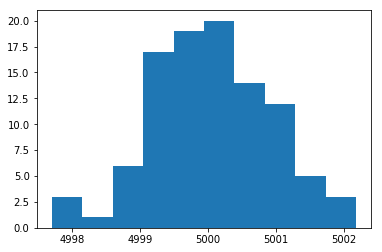

In [150]:
# histogram plot of a small sample
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate a univariate data sample
data = randn(100) + 100 *50
# histogram
pyplot.hist(data)
pyplot.show()

In [146]:
data

array([181.21726818,  69.41217932,  73.59141239,  46.35156889,
       143.27038147, -15.07693484, 187.24058821,  61.93965496,
       115.9519548 ,  87.53148123, 173.10539685,  -3.00703547,
        83.8791398 ,  80.79728227, 156.68847212,  45.00543663,
        91.37858962,  56.1070791 , 102.11068734, 129.14076069,
        44.96904114, 157.23618549, 145.07953603, 125.12471695,
       145.04279746,  65.81360704,  93.85548872,  53.21152829,
        86.60559602, 126.51777334,  65.41696241,  80.16232366,
        65.64136499,  57.73971793,  66.43769346,  99.36677005,
        44.13448257, 111.72078489, 182.99010886, 137.10220803,
        90.40822238,  55.6185518 ,  62.64208531, 184.62273005,
       102.54038774,  68.15021767, 109.54577423, 205.01275682,
       106.00794762, 130.86015549])